In [55]:
import pandas as pd

data = pd.read_csv(
    "household_power_consumption.txt",
    sep=";",
    low_memory=False
)



In [56]:
data["Datetime"] = pd.to_datetime(
    data["Date"] + " " + data["Time"],
    dayfirst=True
)
data.set_index("Datetime", inplace=True)


In [57]:
data.index


DatetimeIndex(['2006-12-16 17:24:00', '2006-12-16 17:25:00',
               '2006-12-16 17:26:00', '2006-12-16 17:27:00',
               '2006-12-16 17:28:00', '2006-12-16 17:29:00',
               '2006-12-16 17:30:00', '2006-12-16 17:31:00',
               '2006-12-16 17:32:00', '2006-12-16 17:33:00',
               ...
               '2010-11-26 20:53:00', '2010-11-26 20:54:00',
               '2010-11-26 20:55:00', '2010-11-26 20:56:00',
               '2010-11-26 20:57:00', '2010-11-26 20:58:00',
               '2010-11-26 20:59:00', '2010-11-26 21:00:00',
               '2010-11-26 21:01:00', '2010-11-26 21:02:00'],
              dtype='datetime64[ns]', name='Datetime', length=2075259, freq=None)

In [28]:
numeric_cols = data.columns.drop(["Date", "Time"])

data[numeric_cols] = data[numeric_cols].apply(
    pd.to_numeric, errors="coerce"
)



In [29]:
data = data.dropna()



In [30]:
data = data.drop_duplicates()



In [31]:
data.shape
data.head()



,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,,,
2006-12-16 17:24:00,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [32]:
hourly = data.resample("h").mean(numeric_only=True)




In [33]:
hourly.shape
hourly.describe()



,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000
mean,1.091728,0.123727,240.839393,4.628238,1.121631,1.298566,6.458882
std,0.897619,0.066851,3.001093,3.757797,3.538046,4.192874,7.351219
min,0.124000,0.000000,225.834500,0.503333,0.000000,0.000000,0.000000
25%,0.341925,0.078000,239.180667,1.513333,0.000000,0.000000,0.650000
50%,0.802850,0.106917,240.977833,3.423333,0.000000,0.333333,1.650000
75%,1.579342,0.149433,242.695000,6.606667,0.000000,0.650000,14.216667
max,6.560533,0.774333,251.902000,28.383333,48.366667,46.433333,21.550000


In [34]:
data.columns


Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [35]:
data.shape


(2049280, 9)

In [36]:
hourly = data.resample("h").mean(numeric_only=True)



In [37]:
hourly.shape
hourly.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667


In [38]:
hourly["hour"] = hourly.index.hour
hourly["dayofweek"] = hourly.index.dayofweek
hourly["month"] = hourly.index.month


In [39]:
data.isna().sum().sum()
data.duplicated().sum()


np.int64(0)

In [40]:
type(data.index)
data.index.is_monotonic_increasing


True

In [41]:
hourly.shape
hourly.index.freq


<Hour>

In [42]:
hourly[["Global_active_power", "hour"]].head()


,Global_active_power,hour
Datetime,,
2006-12-16 17:00:00,4.222889,17
2006-12-16 18:00:00,3.632200,18
2006-12-16 19:00:00,3.400233,19
2006-12-16 20:00:00,3.268567,20
2006-12-16 21:00:00,3.056467,21


In [43]:
hourly.columns


Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'hour', 'dayofweek', 'month'],
      dtype='object')

In [44]:
hourly.isna().sum().sum()


np.int64(2947)

In [45]:

hourly = hourly.dropna()


In [46]:
hourly.isna().sum().sum()
hourly.shape


(34168, 10)

In [47]:
hourly.index.is_unique
hourly.index.is_monotonic_increasing


True

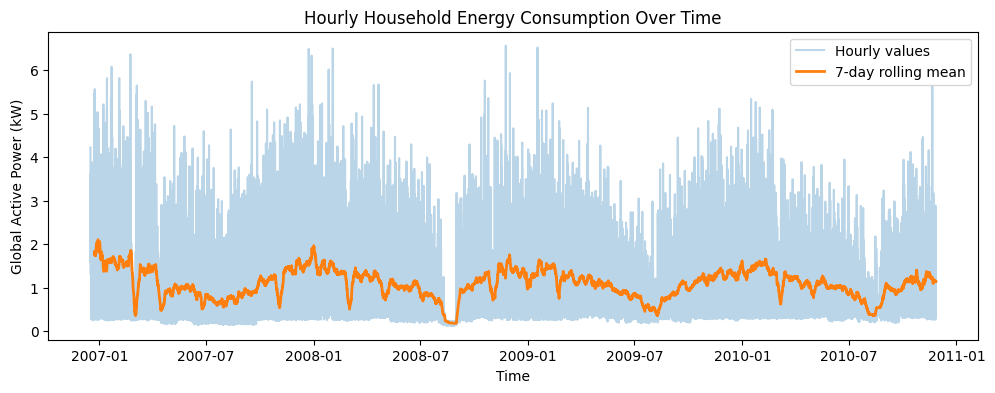

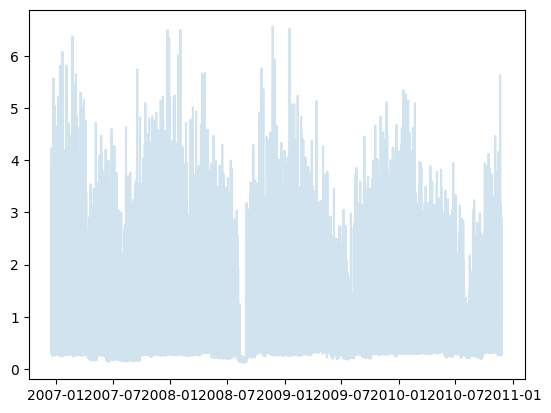

In [48]:
#figure1

plt.figure(figsize=(12,4))

plt.plot(hourly.index, hourly["Global_active_power"], alpha=0.3, label="Hourly values")

plt.plot(
    hourly.index,
    hourly["Global_active_power"].rolling(window=168).mean(),
    linewidth=2,
    label="7-day rolling mean"
)

plt.title("Hourly Household Energy Consumption Over Time")
plt.xlabel("Time")
plt.ylabel("Global Active Power (kW)")
plt.legend()
plt.show()

plt.plot(
    hourly.index,
    hourly["Global_active_power"],
    alpha=0.2,
    label="Hourly values"
)



<Figure size 1000x400 with 0 Axes>

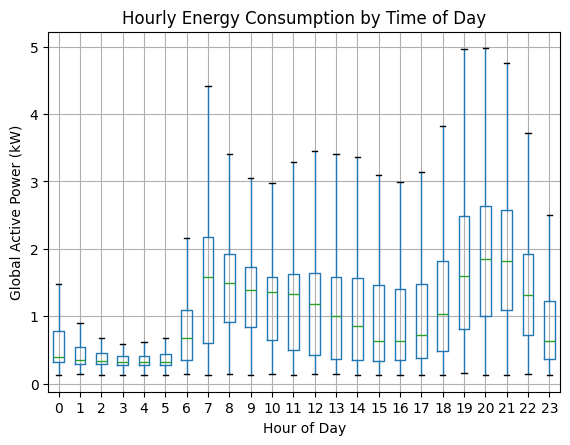

In [49]:

#figure2

plt.figure(figsize=(10,4))
hourly.boxplot(
    column="Global_active_power",
    by="hour",
    showfliers=False
)
plt.title("Hourly Energy Consumption by Time of Day")
plt.suptitle("")
plt.xlabel("Hour of Day")
plt.ylabel("Global Active Power (kW)")
plt.show()


<Figure size 1000x400 with 0 Axes>

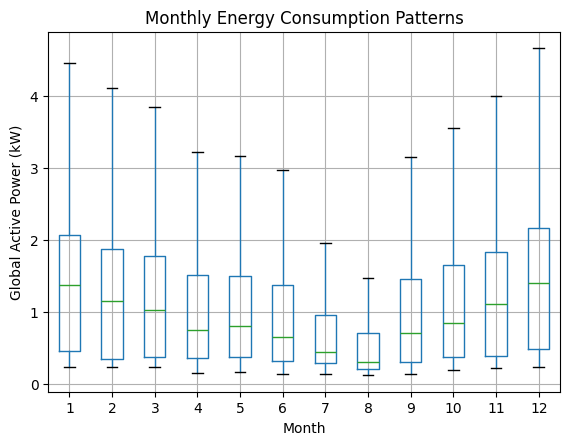

In [50]:
#figure3

import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
hourly.boxplot(
    column="Global_active_power",
    by="month",
    showfliers=False
)
plt.title("Monthly Energy Consumption Patterns")
plt.suptitle("")
plt.xlabel("Month")
plt.ylabel("Global Active Power (kW)")
plt.show()


In [51]:
hourly.info()
hourly.describe()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34168 entries, 2006-12-16 17:00:00 to 2010-11-26 21:00:00
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    34168 non-null  float64
 1   Global_reactive_power  34168 non-null  float64
 2   Voltage                34168 non-null  float64
 3   Global_intensity       34168 non-null  float64
 4   Sub_metering_1         34168 non-null  float64
 5   Sub_metering_2         34168 non-null  float64
 6   Sub_metering_3         34168 non-null  float64
 7   hour                   34168 non-null  int32  
 8   dayofweek              34168 non-null  int32  
 9   month                  34168 non-null  int32  
dtypes: float64(7), int32(3)
memory usage: 3.5 MB


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,dayofweek,month
count,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000
mean,1.091728,0.123727,240.839393,4.628238,1.121631,1.298566,6.458882,11.504888,2.989522,6.454724
std,0.897619,0.066851,3.001093,3.757797,3.538046,4.192874,7.351219,6.925248,1.997732,3.423204
min,0.124000,0.000000,225.834500,0.503333,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.341925,0.078000,239.180667,1.513333,0.000000,0.000000,0.650000,6.000000,1.000000,3.000000
50%,0.802850,0.106917,240.977833,3.423333,0.000000,0.333333,1.650000,12.000000,3.000000,6.000000
75%,1.579342,0.149433,242.695000,6.606667,0.000000,0.650000,14.216667,18.000000,5.000000,9.000000
max,6.560533,0.774333,251.902000,28.383333,48.366667,46.433333,21.550000,23.000000,6.000000,12.000000


In [52]:
hourly.shape
hourly["Global_active_power"].describe()


count    34168.000000
mean         1.091728
std          0.897619
min          0.124000
25%          0.341925
50%          0.802850
75%          1.579342
max          6.560533
Name: Global_active_power, dtype: float64

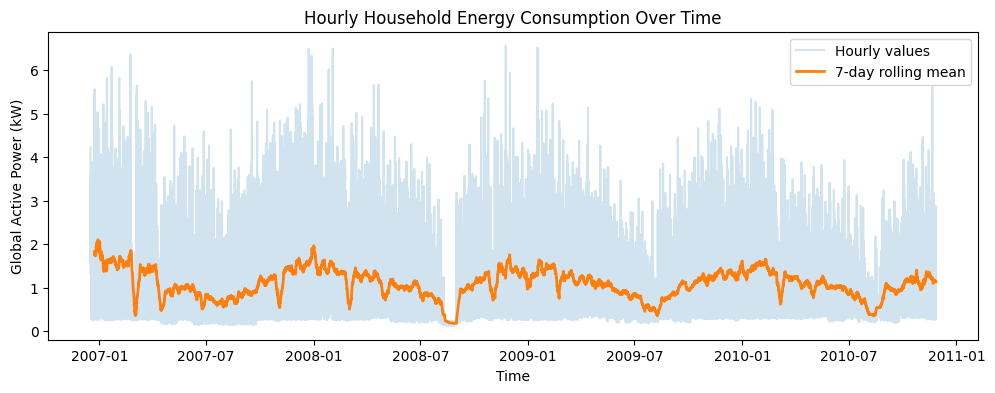

In [53]:
#figure1

import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))


plt.plot(
    hourly.index,
    hourly["Global_active_power"],
    alpha=0.2,
    label="Hourly values"
)


plt.plot(
    hourly.index,
    hourly["Global_active_power"].rolling(window=168).mean(),
    linewidth=2,
    label="7-day rolling mean"
)

plt.title("Hourly Household Energy Consumption Over Time")
plt.xlabel("Time")
plt.ylabel("Global Active Power (kW)")
plt.legend()
plt.show()


<Figure size 1000x400 with 0 Axes>

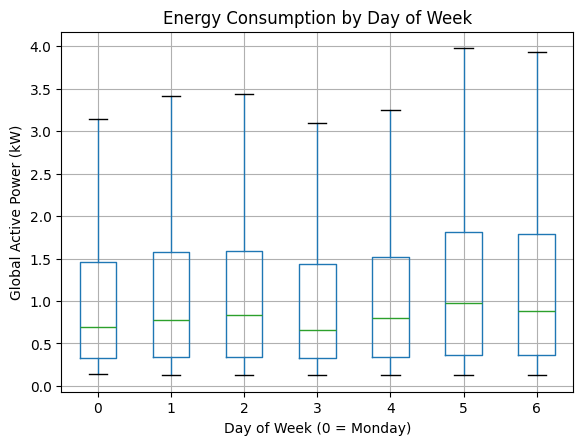

In [54]:
plt.figure(figsize=(10,4))
hourly.boxplot(
    column="Global_active_power",
    by="dayofweek",
    showfliers=False
)
plt.title("Energy Consumption by Day of Week")
plt.suptitle("")
plt.xlabel("Day of Week (0 = Monday)")
plt.ylabel("Global Active Power (kW)")
plt.show()
